In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd "/home/volkan/Repos/multi-tier"
from data_analysis.helpers import *


/home/volkan/Repos/multi-tier


In [15]:
import json


def query_json_db(db_file, parameter_filters):
    """
    Queries a JSON database for entries matching specific parameters.

    Args:
        db_file (str): Path to the JSON database file.
        parameter_filters (dict): Dictionary containing parameter filters,
                                 where keys are parameter names and values are
                                 the desired values.

    Returns:
        tuple: A tuple containing:
            - dict: A dictionary of matching entries (keys are entry IDs, values are data).
            - list: A list of matching entry IDs.
    """

    with open(db_file, "r") as file:
        db_data = json.load(file)

    matching_entries_dict = {}
    matching_entries_params = []

    for entry_id, entry_data in db_data.items():
        if "parameters" in entry_data:
            parameters = entry_data["parameters"]
            if all(
                (
                    parameters.get(param) == value
                    if isinstance(value, (int, float))
                    else parameters.get(param) in value
                )
                for param, value in parameter_filters.items()
            ):
                matching_entries_dict[entry_id] = entry_data
                matching_entries_params.append(parameters)  # Store the matching ID

    return matching_entries_dict, matching_entries_params

# REQ RATE

In [ ]:
db_file = '../sim_outputs/mt_req_abilene_db.json'
fig, ax = plt.subplots()
x_axis = [10,12.5,15,17.5,20,22.5,25]

request_dist_param = 0.75
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-r^", label="mvip", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-ks", label="lfu", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-gx", label="lru", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-yo", label="unif", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,25]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds("abilene", result, param_list, [1,2], [1,2,3,4], "delay")
ax.plot(x_axis, res, "-md", label="fifo", fillstyle="none")
ax.legend([ "MVIP", "LFU", "LRU", "UNIF", "FIFO"],fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Request rate (per sec, per node)",fontsize=15)
fig.savefig("../sim_outputs/mt_req_abilene_075_delay.pdf", bbox_inches='tight')

# PENALTY

In [ ]:
topology = "geant"
db_file = f'sim_outputs/mt_pen_{topology}_db.json'
fig, ax = plt.subplots()

request_dist_param = 0.5

""" parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--rd", label="MVIP, $L_{n_2}=50$", fillstyle="none") """

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--rd", label="MVIP, $L_{n_2}=100$", fillstyle="none")

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,150]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-r^", label="MVIP, $L_{n_2}=150$", fillstyle="none")

""" parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,50]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--ks", label="PALFU, $L_{n_2}=50$", fillstyle="none") """

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,100]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "--ks", label="PALFU, $L_{n_2}=100$", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "palfu",
    "request_dist_param": request_dist_param,
    "cache_capacities": [5,150]
}
db, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "delay")
rpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_read_penalties")
wpen = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, [1,2], [1,2,3,4,5], "cache_write_penalties")
pen = np.sum(rpen + wpen, axis=1)
ax.plot(pen, res, "-kx", label="PALFU, $L_{n_2}=150$", fillstyle="none")


ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Total penalty",fontsize=14)
ax.legend(fontsize=14)
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useMathText=True)
fig.savefig("sim_outputs/mt_pen_geant_05.pdf", bbox_inches='tight')

# CACHE SIZE

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'
fig, ax = plt.subplots()
#x_axis = list(range(6))
x_axis = list(range(9))
request_dist_param = 0.5
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
cache_hits = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
ax.plot(x_axis, res, "-r^", label="mvip", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-ks", label="lfu", fillstyle="none")

db_file = f'sim_outputs/st_size_lfuvip_{topology}_db.json'
parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "vip2",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--rd", label="vip", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "--kx", label="lfu", fillstyle="none")


ax.legend(["MVIP (two tiers)", "LFU (two tiers)", "VIP (one tier)", "LFU (one tier)"],fontsize=14,loc="center",bbox_to_anchor=(0.5, 0.8))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')

## CACHE SIZE - HITS

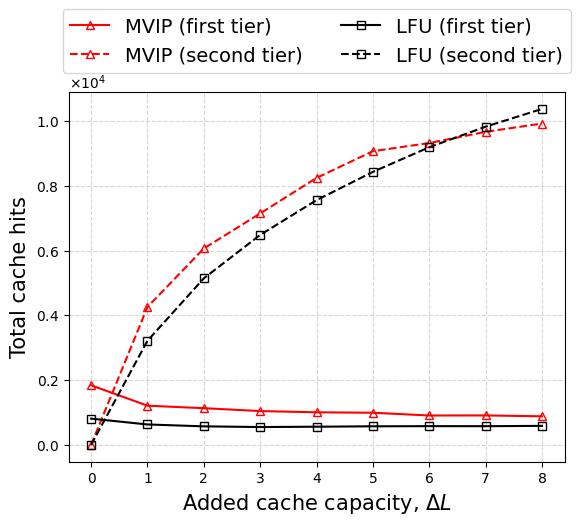

In [73]:
topology="geant"
db_file = f'sim_outputs/mt_size_lfuvip_{topology}_db.json'

fig, ax = plt.subplots()
#x_axis = list(range(6))
x_axis = list(range(9))

request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "vip",
    "cache_pol": "mvip",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-r^", label="MVIP (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--r^", label="MVIP (second tier)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lfu",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate,
    "cache_capacities": [[5,25],[5,50],[5,75],[5,100],[5,125],[5,150],[5,175],[5,200]]
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")

parameter_filters["cache_capacities"] = [[5]]
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
tmp = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "cache_hits")
tmp = np.append(tmp[0],0)
tmp = np.array([tmp])
res = np.vstack((tmp,res))
res_first, res_second = np.hsplit(res, 2)
ax.plot(x_axis, res_first, "-ks", label="LFU (first tier)", fillstyle="none")
ax.plot(x_axis, res_second, "--ks", label="LFU (second tier)", fillstyle="none")

ax.legend(fontsize=14,ncol=2,loc="upper center",bbox_to_anchor=(0.5, 1.25))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total cache hits",fontsize=15)
ax.set_xlabel("Added cache capacity, $\Delta L$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
#fig.savefig(f"sim_outputs/size_comp_{topology}_{request_dist_param_str}_{request_rate_str}_hits.pdf", bbox_inches='tight')

In [ ]:
topology="geant"
db_file = f'sim_outputs/mt_size_baselines_{topology}_db.json'
fig, ax = plt.subplots()
x_axis = np.linspace(0, 50, 11, endpoint=True)
request_dist_param = 0.75
request_rate = 15

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-gx", label="LRU (two tiers)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "fifo",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-md", label="FIFO (two tiers)", fillstyle="none")

parameter_filters = {
    "fwd_pol": "lrt",
    "cache_pol": "unif",
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
ax.plot(x_axis, res, "-yo", label="UNIF (two tiers)", fillstyle="none")

db_file = f'sim_outputs/nocaching_{topology}_db.json'
parameter_filters = {
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
res = [res[0]] * len(x_axis)
ax.plot(x_axis, res, "--b", label="No caching")

db_file = f'sim_outputs/st_size_baselines_{topology}_db.json'
parameter_filters = {
    "request_dist_param": request_dist_param,
    "request_rate": request_rate
}
result, param_sets = query_json_db(db_file, parameter_filters)
param_list = dictsToParamSets(param_sets)
res = getDataFieldSumAvgsAcrossSeeds(topology, result, param_list, [1,2], [1,2,3,4,5], "delay")
res_lru_5, res_lru_10, res_fifo_5, res_fifo_10, res_unif_5, res_unif_10 = [res[0]] * len(x_axis), [res[1]] * len(x_axis), [res[2]] * len(x_axis), [res[3]] * len(x_axis), [res[4]] * len(x_axis), [res[5]] * len(x_axis)
ax.plot(x_axis, res_lru_5, "--g", label="LRU (one tier, $L_{n_1}=5$)", fillstyle="none")
ax.plot(x_axis, res_lru_10, ":g", label="LRU (one tier, $L_{n_1}=10$)", fillstyle="none")
ax.plot(x_axis, res_fifo_5, "--m", label="FIFO (one tier, $L_{n_1}=5$)", fillstyle="none")
ax.plot(x_axis, res_fifo_10, ":m", label="FIFO (one tier, $L_{n_1}=10$)", fillstyle="none")
ax.plot(x_axis, res_unif_5, "--y", label="UNIF (one tier, $L_{n_1}=5$)", fillstyle="none")
ax.plot(x_axis, res_unif_10, ":y", label="UNIF (one tier, $L_{n_1}=10$)", fillstyle="none")

#ax.legend(fontsize=14)
ax.legend(fontsize=14,loc="upper right",bbox_to_anchor=(1.65,1))
ax.grid(linestyle="--",alpha=0.5)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
ax.set_xlabel("Second tier capacity, $L_{n_2}$",fontsize=15)
request_dist_param_str = str(request_dist_param).replace(".","")
request_rate_str = str(request_rate)
fig.savefig(f"sim_outputs/size_comp_baselines_{topology}_{request_dist_param_str}_{request_rate_str}_delay.pdf", bbox_inches='tight')